# バイアス付きのデータを作成する

In [2]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 

In [3]:
# dataset
# dataset_name = "human"
dataset_name = "celegans"

In [4]:
df = pd.read_csv("../../data/maked/default/" + dataset_name + ".csv", header=0)
df.head()

,compound,protein,label
0,CCC(=O)O,MSRALLFFVLAILALSAEARGPRVTDKVFFDMEIGGRPVGKIVIGL...,0
1,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,MNDLQWPLLGLFSVLIILALFGNLLVCAAILWDRSLRKQPENLFLV...,1
2,CC(CC1=CC2=C(C=C1)OCO2)NC,MLRWHSVRRKQHQQLQAELSSGAASMLSAPESRRVSRSMSVKAPTA...,1
3,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,MIKFLLFLAIAAATVISNAELAVPTASISAHVLDISGGSPAGGIQI...,1
4,COC(=O)C1=CC=CC=C1C(=O)OC,MTPKPNTTSPTNNLPLLSKDSPDIESLLILNPKVQDKANAVPSAVT...,0


In [5]:
df_compound = pd.DataFrame(df["compound"].unique(), columns=["compound"])
df_compound.head()

,compound
0,CCC(=O)O
1,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...
2,CC(CC1=CC2=C(C=C1)OCO2)NC
3,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O
4,COC(=O)C1=CC=CC=C1C(=O)OC


In [6]:
# df_compound['compound_id'] = df_compound['compound'].factorize()[0]
# df = pd.merge(df, df_compound, how="left", on="compound")
# df.head()

In [7]:
print("全データ数: {}, 正例数: {}, 負例数: {}".format(len(df),df["label"].sum(),len(df)-df["label"].sum()))

全データ数: 7786, 正例数: 3893, 負例数: 3893


In [8]:
print("化合物数: {}, タンパク質数: {}".format(len(df["compound"].unique()),len(df["protein"].unique())))

化合物数: 1767, タンパク質数: 1876


## SMILES形式のデータから分子量を計算する

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

In [10]:
df_compound["weight"] = df_compound["compound"].map(lambda sm: rdMolDescriptors._CalcMolWt(Chem.MolFromSmiles(sm)))
df_compound.head()

RDKit WARNING: [14:47:50] WARNING: not removing hydrogen atom without neighbors
[14:47:50] WARNING: not removing hydrogen atom without neighbors


,compound,weight
0,CCC(=O)O,74.079
1,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,375.871
2,CC(CC1=CC2=C(C=C1)OCO2)NC,193.246
3,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,228.247
4,COC(=O)C1=CC=CC=C1C(=O)OC,194.186


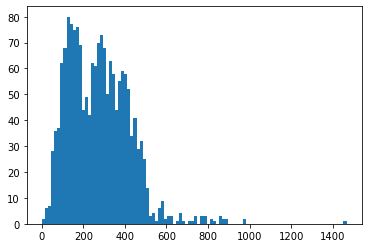

In [11]:
plt.hist(df_compound["weight"].values, bins=100)
plt.show()

In [12]:
df_compound["weight_norm"] = (df_compound["weight"] - df_compound["weight"].mean()) / df_compound["weight"].std()

df_compound.head()

,compound,weight,weight_norm
0,CCC(=O)O,74.079,-1.373031
1,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,375.871,0.694848
2,CC(CC1=CC2=C(C=C1)OCO2)NC,193.246,-0.556499
3,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,228.247,-0.316672
4,COC(=O)C1=CC=CC=C1C(=O)OC,194.186,-0.550058


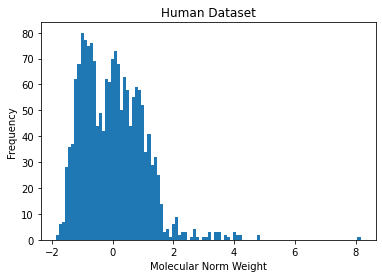

In [13]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_title("Human Dataset")
ax.set_xlabel("Molecular Norm Weight")
ax.set_ylabel("Frequency")
ax.hist(df_compound["weight_norm"].values, bins=100)
plt.show()
fig.savefig("human_norm_weight.png")

In [24]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(x+2))

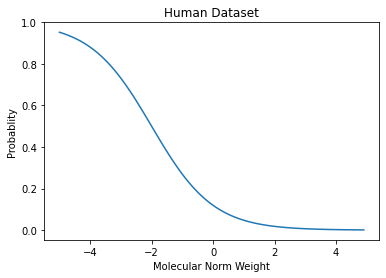

In [25]:
x = np.arange(-5, 5, 0.1)
y = list(map(sigmoid, x))

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_title("Human Dataset")
ax.set_xlabel("Molecular Norm Weight")
ax.set_ylabel("Probablity")
ax.plot(x,y)
plt.show()
fig.savefig("sigmoid2.png")

In [119]:
df_compound["prob"] = df_compound["weight_norm"].map(sigmoid)
df_compound.head()

,compound,weight,weight_norm,prob
0,CCC(=O)O,74.079,-1.373031,0.797869
1,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,375.871,0.694848,0.332956
2,CC(CC1=CC2=C(C=C1)OCO2)NC,193.246,-0.556499,0.635642
3,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,228.247,-0.316672,0.578513
4,COC(=O)C1=CC=CC=C1C(=O)OC,194.186,-0.550058,0.634149


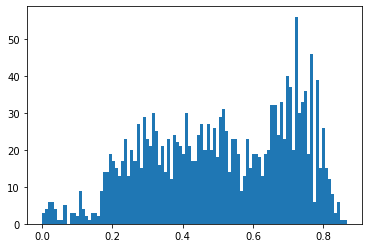

In [120]:
plt.hist(df_compound["prob"].values, bins=100)
plt.show()

In [121]:
count_compound = df["compound"].value_counts().to_dict()
def counting(x):
    return count_compound[x]

In [122]:
df_compound["observed"] = df_compound["compound"].map(counting)
df_compound["observed_norm"] = (df_compound["observed"] - df_compound["observed"].mean()) / df_compound["observed"].std()

df_compound.head()

,compound,weight,weight_norm,prob,observed,observed_norm
0,CCC(=O)O,74.079,-1.373031,0.797869,5,0.037131
1,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,375.871,0.694848,0.332956,8,0.224770
2,CC(CC1=CC2=C(C=C1)OCO2)NC,193.246,-0.556499,0.635642,2,-0.150507
3,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,228.247,-0.316672,0.578513,3,-0.087961
4,COC(=O)C1=CC=CC=C1C(=O)OC,194.186,-0.550058,0.634149,1,-0.213054


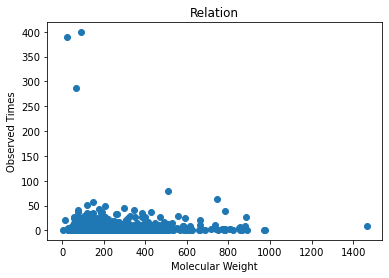

In [123]:
weight = df_compound["weight"].values
observed = df_compound["observed"].values
plt.scatter(x=weight, y=observed)
plt.xlabel("Molecular Weight")
plt.ylabel("Observed Times")
plt.title("Relation")
plt.show() 

In [124]:
li = []
for i in range(50):
    if i < 49:
        df_new = df_compound[(df_compound["weight"] < (i+1) * 20) & (i * 20 <= df_compound["weight"])]
    else:
        df_new = df_compound[(i * 20 <= df_compound["weight"])]
    if 0 == len(df_new["observed"].values):
        m = 0
    else:
        m = np.sum(df_new["observed"].values)
    li.append(m)

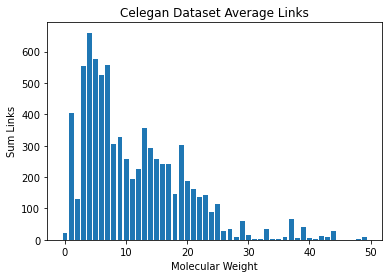

In [126]:
fig, ax = plt.subplots()
# Axesに棒グラフを追加
ax.bar(range(len(li)), li)
fig.patch.set_facecolor('white')
ax.set_title("Celegan Dataset Average Links")
# ax.set_title("Human Dataset Sum Links")
ax.set_xlabel("Molecular Weight")
ax.set_ylabel("Sum Links")
fig.savefig("celegan_sum_links.png")
plt.show()